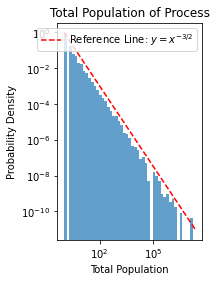

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
num_simulations = 10000
max_generations = 100000

# Function to simulate one branching process
def simulate_branching_process():
    generations = 0
    nodes = 1
    total_pop = 1
    max_pop = 1

    while nodes > 0 and generations < max_generations:
        # Number of new nodes follows a Poisson distribution
        new_nodes = np.random.poisson(nodes)

        # Update nodes for the next generation
        nodes = new_nodes
        total_pop = total_pop + nodes
        max_pop = nodes if nodes > max_pop else max_pop
        generations += 1

    return total_pop # or max_pop or total_pop

# Run simulations
extinction_times = [simulate_branching_process() for _ in range(num_simulations)]

# Plot histogram on log-log scale with equal aspect ratio
plt.hist(extinction_times, bins=np.logspace(0, np.log10(max(extinction_times)), 50), density=True, alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Total Population of Process')
plt.xlabel('Total Population')
plt.ylabel('Probability Density')

# Add reference line with slope -3/2
x_vals = np.logspace(0, np.log10(max(extinction_times)), 100)
y_vals = x_vals**(-3/2)
plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Reference Line: $y = x^{-3/2}$')

plt.gca().set_aspect('equal', adjustable='box')  # Set equal aspect ratio
plt.legend()
plt.show()

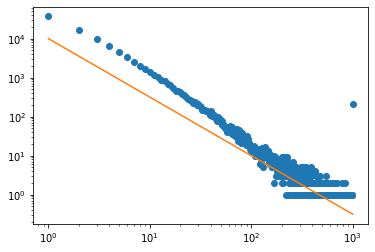

In [45]:
def critical_branching_process(max_generations):
    """
    Simulate a critical branching process until extinction.

    :param max_generations: Maximum number of generations to simulate.
    :return: Number of generations until extinction.
    """
    population = 1  # Start with an initial population of 1
    generations = 0  # Generation counter

    # Loop until the population goes extinct or reaches the maximum generations
    while population > 0 and generations < max_generations:
        # The population for the next generation is the sum of Poisson-distributed random variables,
        # each representing the offspring count for each individual in the current population.
        population = sum(np.random.poisson(1.0, population))
        generations += 1  # Increment generation counter

    return generations  # Return the number of generations

# Parameters for the simulation
num_simulations = 100000  # Number of branching process simulations to run
max_generations = 1000   # Maximum number of generations for each simulation

# Run the simulations and store the lifetimes
lifetimes = [critical_branching_process(max_generations) for _ in range(num_simulations)]

# Count the frequency of each lifetime
lifetime_counts = np.bincount(lifetimes)

# Generate an array of generation indices
generations = np.arange(len(lifetime_counts))

# Filter out zero generation for plotting
nonzero = generations > 0

# Plot the simulation data on a log-log scale
plt.loglog(generations[nonzero], lifetime_counts[nonzero], marker='o', linestyle='none', label='Simulation Data')

# Adding a line with a slope of -3/2 in log-log space
# Create a range of x values for plotting the theoretical line
x_range = np.linspace(min(generations[nonzero]), max(generations[nonzero]), 100)

# Constant C for the theoretical line, adjust as needed for alignment
C = 10000
# Calculate the y values for the theoretical line
y_line = C * x_range ** (-3/2)

# Plot the theoretical line
plt.loglog(x_range, y_line, label='y = Cx^-3/2')

# Add labels, title, and legend to the plot



In [3]:
import numpy as np
# my stuff

# I think the major difference between what I was doing and what he was doing was 
# he is doing what I was doing multiple times

def branch(max_gen, lmd=1.0):

    population = 1
    generations = 0 
    while population > 0 and generations < max_gen:
        population = sum(np.random.poisson(lmd, population))
        generations += 1
    
    return generations

num_sim = 1000
max_gen = 100

lifetimes = [branch(max_gen, lmd=1.0) for _ in range(num_sim)]

life_counts = np.bincount(lifetimes)

generations = np.arange(len(life_counts))

